In [1]:
require(lme4)

Loading required package: lme4

Loading required package: Matrix

Loading required package: ggplot2



In this one (I don't know wether we will have enough time to run it) we will apply a linear mixed model with both predictors and on the trial level rather than on the pre-averaged data.

In [2]:
data = read.csv("data.csv", sep='')
data$encoding = as.character(data$encoding)
data$participant = as.character(data$participant)
data$ease = data$ease-3
data$encoding = ifelse(data$encoding == "standard", 0, 1)

# Fitting a LMM at the trial level

Here we build a linear mixed model with all fixed effects (simple and interaction) and all random effects (intercept and all effects)

In [3]:
lmm <- lmer(rt ~ ease * encoding + (ease*encoding|participant), data = data)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00901832 (tol = 0.002, component 1)”


In [4]:
summary(lmm)

Linear mixed model fit by REML ['lmerMod']
Formula: rt ~ ease * encoding + (ease * encoding | participant)
   Data: data

REML criterion at convergence: 26434.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6653 -0.5382 -0.1594  0.2775 15.9556 

Random effects:
 Groups      Name          Variance  Std.Dev. Corr             
 participant (Intercept)   0.0083748 0.09151                   
             ease          0.0007056 0.02656  -0.64            
             encoding      0.0034735 0.05894   0.46 -0.76      
             ease:encoding 0.0001453 0.01205  -0.24  0.03  0.21
 Residual                  0.0757870 0.27529                   
Number of obs: 100000, groups:  participant, 50

Fixed effects:
               Estimate Std. Error t value
(Intercept)    0.568718   0.013000   43.75
ease          -0.076897   0.003856  -19.94
encoding       0.417829   0.008515   49.07
ease:encoding  0.108525   0.002103   51.61

Correlation of Fixed Effects:
            (Intr) ease   

## Oh... and the assumption of our model ??

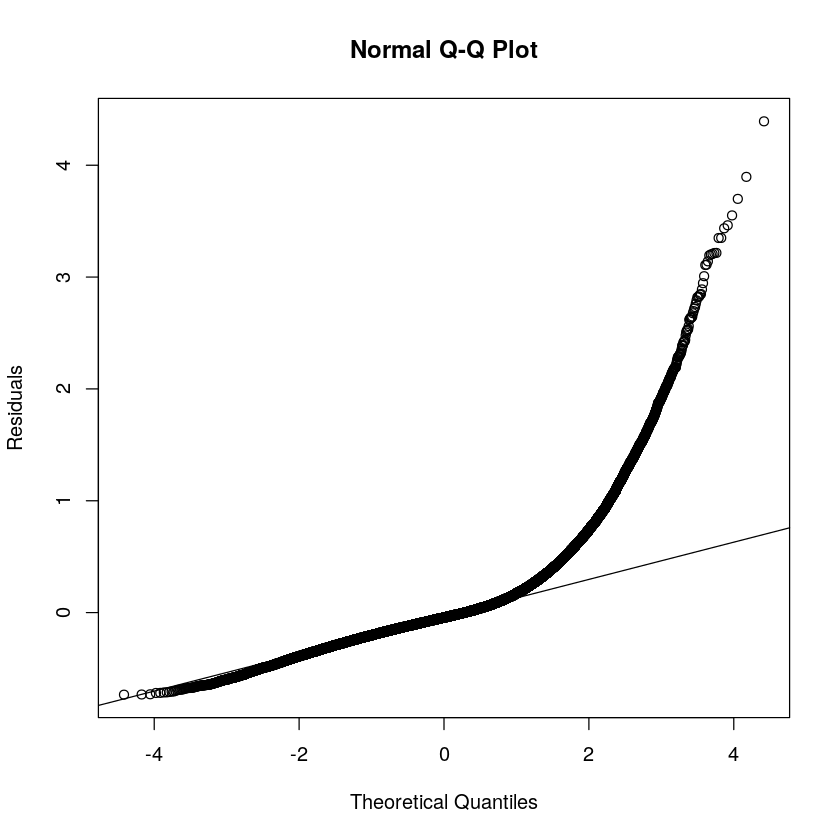

In [5]:
qqnorm(residuals(lmm), ylab="Residuals")
qqline(residuals(lmm))

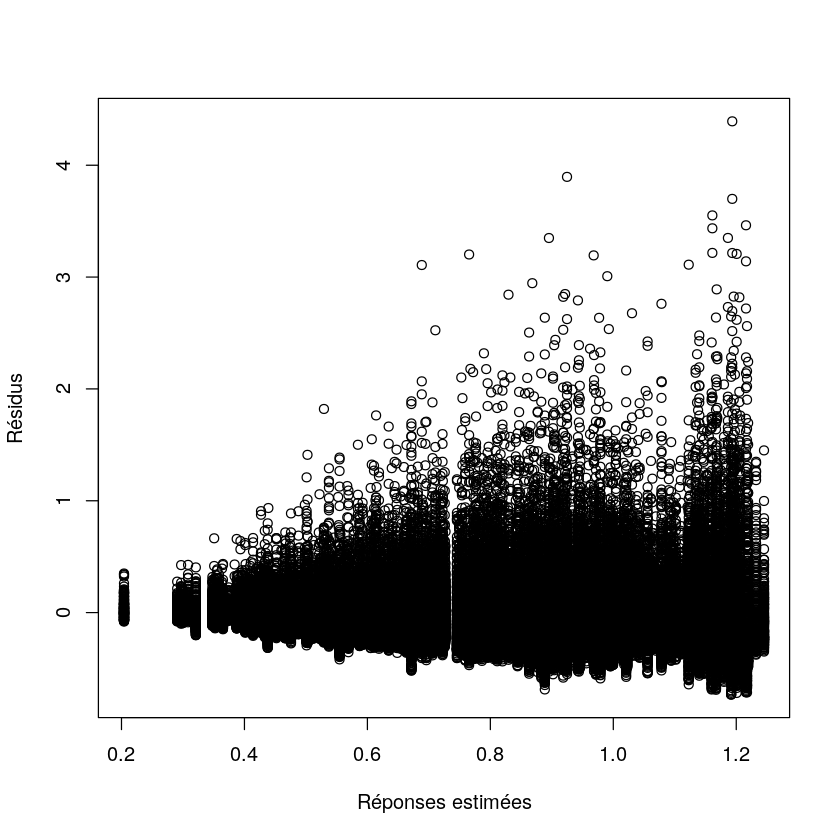

In [6]:
plot(fitted(lmm),resid(lmm),main="",xlab="Réponses estimées",ylab="Résidus")

Something is off...

# Fitting a LMM at the trail level with a log transform

In [7]:
data$logrt = log(data$rt*1000)

In [8]:
lmm2 <- lmer(logrt ~ ease * encoding + (encoding*ease|participant), data = data)

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00473299 (tol = 0.002, component 1)”


In [9]:
summary(lmm2)

Linear mixed model fit by REML ['lmerMod']
Formula: logrt ~ ease * encoding + (encoding * ease | participant)
   Data: data

REML criterion at convergence: 30963.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6986 -0.6223 -0.1422  0.4934  6.4318 

Random effects:
 Groups      Name          Variance  Std.Dev. Corr             
 participant (Intercept)   0.0298240 0.17270                   
             encoding      0.0069135 0.08315  -0.70            
             ease          0.0011266 0.03357   0.00 -0.49      
             encoding:ease 0.0008138 0.02853  -0.73  0.80 -0.53
 Residual                  0.0792128 0.28145                   
Number of obs: 100000, groups:  participant, 50

Fixed effects:
               Estimate Std. Error t value
(Intercept)    6.267676   0.024455  256.29
ease          -0.112939   0.004830  -23.39
encoding       0.572979   0.011893   48.18
ease:encoding  0.166639   0.004226   39.43

Correlation of Fixed Effects:
            (Intr) ease

## Oh... and the assumption of our model ??

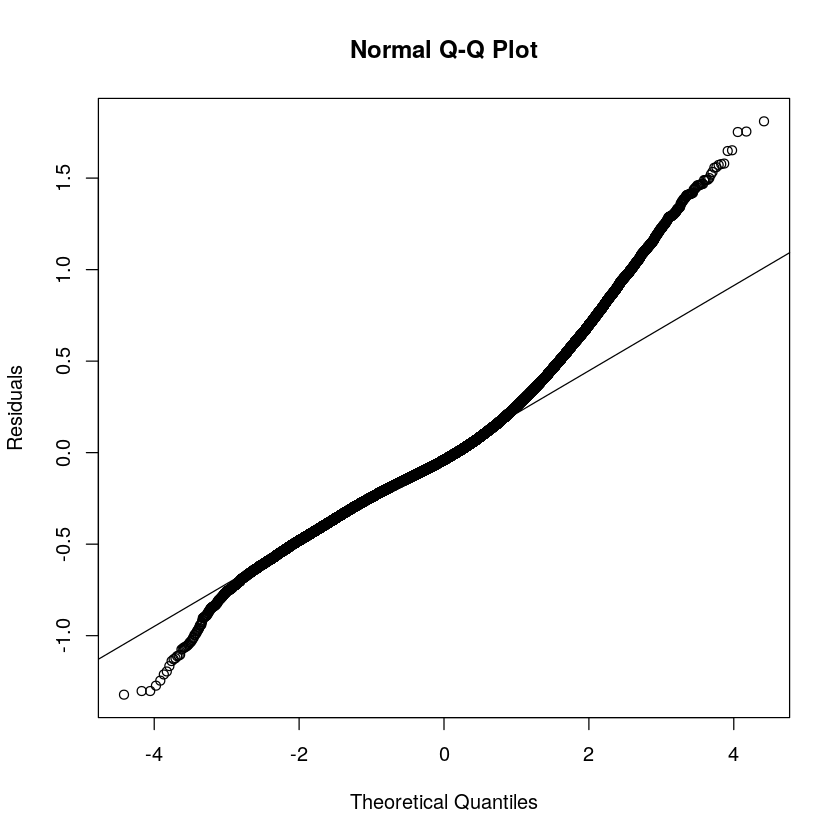

In [10]:
qqnorm(residuals(lmm2), ylab="Residuals")
qqline(residuals(lmm2))

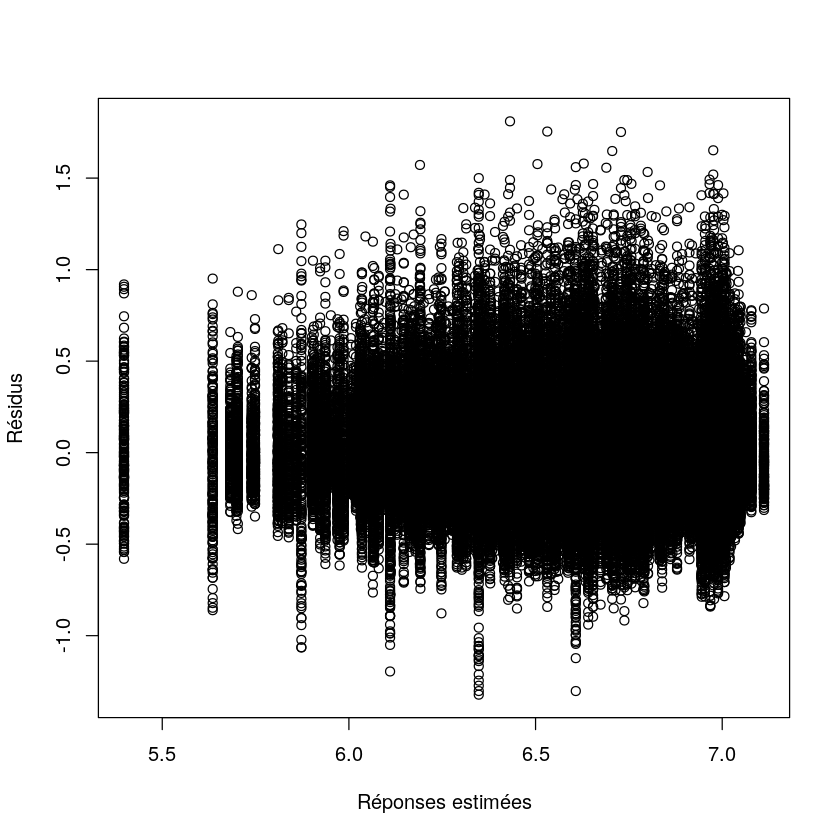

In [11]:
plot(fitted(lmm2),resid(lmm2),main="",xlab="Réponses estimées",ylab="Résidus")